In [1]:
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
#import imutils

import matplotlib.pyplot as plt

/home/ashutosh/anaconda3/envs/dlearner/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:

#(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
#mnist.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
trainData=np.genfromtxt('../data/x_train.csv',delimiter=",")
testData=np.genfromtxt('../data/y_train.csv',delimiter=",")
trainLabels=np.genfromtxt('../data/x_test.csv',delimiter=",")
testLabels=np.genfromtxt('../data/y_test.csv',delimiter=",")




In [51]:
(trainData, testData, trainLabels, testLabels) = train_test_split(trainData,
testData, test_size=0.18, random_state=42)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [52]:
print(trainData.shape,testData.shape,trainLabels.shape,testLabels.shape)

(12546, 1024) (3060, 1024) (12546,) (3060,)


In [53]:
testData

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

training data points: 12546
validation data points: 1394
testing data points: 3060


In [55]:
for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

k=1, accuracy=97.78%
k=3, accuracy=97.42%
k=5, accuracy=97.56%
k=7, accuracy=97.70%
k=9, accuracy=97.49%
k=11, accuracy=97.27%
k=13, accuracy=97.13%
k=15, accuracy=96.84%
k=17, accuracy=96.70%
k=19, accuracy=96.27%
k=21, accuracy=96.48%
k=23, accuracy=96.34%
k=25, accuracy=96.13%
k=27, accuracy=95.84%
k=29, accuracy=95.62%


In [56]:

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],accuracies[i] * 100))

k=1 achieved highest accuracy of 97.78% on validation data


In [57]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
print(predictions)

[ 8.  9.  5. ...,  8.  0.  0.]


In [58]:
print(testLabels.shape)
print(predictions.shape)

print(testLabels)
print(predictions)

(3060,)
(3060,)
[ 8.  9.  5. ...,  8.  4.  0.]
[ 8.  9.  5. ...,  8.  0.  0.]


In [59]:
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99       301
        1.0       1.00      1.00      1.00       286
        2.0       0.94      0.98      0.96       297
        3.0       0.99      0.93      0.96       310
        4.0       0.99      0.99      0.99       306
        5.0       0.99      0.98      0.99       302
        6.0       1.00      0.99      1.00       311
        7.0       1.00      0.99      1.00       328
        8.0       1.00      1.00      1.00       311
        9.0       1.00      1.00      1.00       308

avg / total       0.99      0.99      0.99      3060

Confusion matrix
[[301   0   0   0   0   0   0   0   0   0]
 [  0 286   0   0   0   0   0   0   0   0]
 [  1   1 292   3   0   0   0   0   0   0]
 [  0   0  18 289   0   3   0   0   0   0]
 [  1   0   0   0 303   0   0   0   1   1]
 [  0   0   2   0   3 297   0   0   0   0]
 [  3   0   0   0   0   0 308   0   0   0]
 [  2   0   0   

i think tha digit is : 9.0


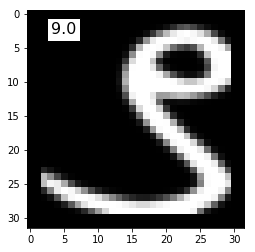

i think tha digit is : 2.0


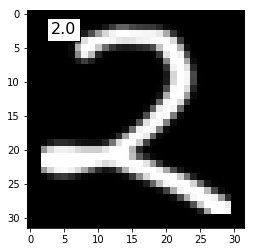

i think tha digit is : 3.0


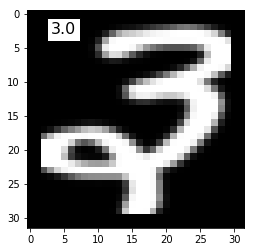

i think tha digit is : 1.0


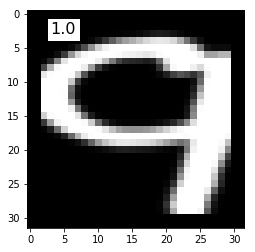

i think tha digit is : 8.0


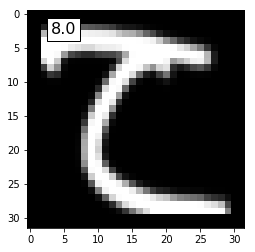

In [24]:

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
         # then resize it to 32 x 32 pixels so we can see it better
##         image = image.reshape((64, 64))
##         image = exposure.rescale_intensity(image, out_range=(0, 255))
##         image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((32,32))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("i think tha digit is : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
        